# COVID-19: report su casi e vaccinazioni in diverse aree del mondo
### Dataset curato da Our World in Data

In [301]:
# Importo le librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
# Percorso del file CSV (utilizzo un percorso relativo perchè i file sono nella stessa cartella)
file_path = 'owid-covid-data.csv'

# Carico il dataset
df = pd.read_csv(file_path)

## 1) Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [304]:
# Verifico le dimensioni del dataset
print("Dimensioni del dataset:")
print(df.shape)

# Esamino i metadati (nomi delle colonne e tipi di dati)
print("Metadati del dataset:")
print(df.info())

Dimensioni del dataset:
(409576, 67)
Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409576 entries, 0 to 409575
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    409576 non-null  object 
 1   continent                                   389982 non-null  object 
 2   location                                    409576 non-null  object 
 3   date                                        409576 non-null  object 
 4   total_cases                                 370544 non-null  float64
 5   new_cases                                   398301 non-null  float64
 6   new_cases_smoothed                          397071 non-null  float64
 7   total_deaths                                347781 non-null  float64
 8   new_deaths                                  398701 non-null  float64
 9   new_deaths_

In [307]:
#visualizzo le prime righe del dataframe per farmi un'idea dei dati
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511  41128772.0   
1            64.83                    0.511  41128772.0   
2            64.83                    0.511  41128772.0   
3            64.83                    0.511  41128772.0   
4            64.83                    0.511  41128772.0   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [309]:
#per lo stesso motivo visualizzo 5 righe a caso
df.sample(5)

iso_code continent       location        date  total_cases  new_cases  \
21771       AUS   Oceania      Australia  2021-09-27     104150.0        0.0   
203809      LIE    Europe  Liechtenstein  2022-06-18      17602.0        0.0   
360988      TZA    Africa       Tanzania  2023-10-20      43108.0        0.0   
77143       COG    Africa          Congo  2021-12-31      20089.0        0.0   
198740      LSO    Africa        Lesotho  2021-12-06      21964.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
21771             1785.429        1312.0         0.0               13.571   
203809              10.857          84.0         0.0                0.143   
360988               3.429         846.0         0.0                0.000   
77143              130.000         367.0         0.0                0.286   
198740              26.714         664.0         0.0                0.286   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
21771   ...          16.5                     NaN                       3.840   
203809  ...           NaN                     NaN                       2.397   
360988  ...          26.7                  47.953                       0.700   
77143   ...          52.3                  47.964                         NaN   
198740  ...          53.9                   2.117                         NaN   

        life_expectancy  human_development_index  population  \
21771             83.44                    0.944  26177410.0   
203809            82.49                    0.919     39355.0   
360988            65.46                    0.529  65497752.0   
77143             64.57                    0.574   5970430.0   
198740            54.33                    0.527   2305826.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
21771                                    NaN                          NaN   
203809                                   NaN                          NaN   
360988                                   NaN                          NaN   
77143                                    NaN                          NaN   
198740                                   NaN                          NaN   

        excess_mortality  excess_mortality_cumulative_per_million  
21771                NaN                                      NaN  
203809               NaN                                      NaN  
360988               NaN                                      NaN  
77143                NaN                                      NaN  
198740               NaN                                      NaN  

[5 rows x 67 columns]

### Analizzo e preparo i dati per le richieste successive

In [311]:
# visualizzo gli elementi unici della colonna 'continent'
df['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [313]:
# converto il dtype della colonna date
df['date'] = pd.to_datetime(df['date'])
print('La colonna date è:', df['date'].dtype)

La colonna date è: datetime64[ns]


In [315]:
# Verifico se ci sono valori nulli nella colonna 'continent'
null_continent = df['continent'].isnull().any()

if null_continent:
    print("Ci sono valori nulli nella colonna 'continent'.")
else:
    print("Non ci sono valori nulli nella colonna 'continent'.")


Ci sono valori nulli nella colonna 'continent'.


## 2) Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente

In [317]:
# Utilizzo .dropna() per rimuovere le righe con valori nulli nella colonna 'continent'
continent_data = df.dropna(subset=['continent'])

# Calcolo il numero totale di casi per ogni continente
continent_cases = continent_data.groupby('continent')['new_cases'].sum()  # ho sommato la colonna 'new_cases' per calcolare il numero totale

# Stampo i risultati formattati, aggiungendo il separatore delle migliaia con un ciclo for
print("Numero totale di casi per continente:")
for continent, cases in continent_cases.items():
    formatted_cases = '{:,}'.format(cases)
    print(f"{continent}: {formatted_cases}")


Numero totale di casi per continente:
Africa: 13,144,264.0
Asia: 301,515,124.0
Europe: 252,672,573.0
North America: 124,572,945.0
Oceania: 14,973,467.0
South America: 68,832,646.0


In [319]:
# Somma della colonna 'new_cases'
somma_new_cases = continent_data['new_cases'].sum()
print("Somma di 'new_cases':", somma_new_cases)


Somma di 'new_cases': 775711019.0


### Questi dati sembrano coerenti con i dati riportati sul sito [https://coronavirus.gimbe.org/epidemia-coronavirus-europa.it-IT.html]

## 3) Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente)

In [321]:
# Nomi dei due continenti
nord_america = 'North America'
europa = 'Europe'

# Selezionare i dati relativi ai due continenti con funzione OR per comprendere anche i dati nella colonna 'location' come richiesto nella traccia
dati_nord_america = continent_data[(continent_data['continent'] == nord_america) | (continent_data['location'] == 'North_America')]
dati_europa = continent_data[(continent_data['continent'] == europa) | (continent_data['location'] == 'Europe')]

# !!! SEMPRE PER LO STESSO DISCORSO DI PRIMA HO UTILIZZATO LA COLONNA 'new_cases' !!!

# Calcolare il valore massimo dei casi totali per ciascun continente
max_nord_america = dati_nord_america['new_cases'].max()
max_europa = dati_europa['new_cases'].max()

# Calcolare la media dei casi totali per ciascun continente
mean_nord_america = dati_nord_america['new_cases'].mean()
mean_europa = dati_europa['new_cases'].mean()

# Calcolare la percentuale dei casi totali nel mondo per ciascun continente
total_cases_world = continent_data['new_cases'].sum()
percentuale_nord_america = (dati_nord_america['new_cases'].sum() / total_cases_world) * 100
percentuale_europa = (dati_europa['new_cases'].sum() / total_cases_world) * 100

# Ho deciso di arrotondare per facilitare la comprensione e evitare fraintendimenti 
print("Descrittori statistici per {} e {}:".format(nord_america, europa))
print("Valore massimo di casi totali:")
print("{}: {:,.0f}, {}: {:,.0f}".format(nord_america, max_nord_america, europa, max_europa))
print("Media di casi totali:")
print("{}: {:,.2f}, {}: {:,.2f}".format(nord_america, mean_nord_america, europa, mean_europa))
print("Percentuale rispetto ai casi totali nel mondo:")
print("{}: {:,.2f}%, {}: {:,.2f}%".format(nord_america, percentuale_nord_america, europa, percentuale_europa))

# Ho deciso di lasciare le virgole come separatori delle migliaia


Descrittori statistici per North America e Europe:
Valore massimo di casi totali:
North America: 5,650,933, Europe: 2,417,043
Media di casi totali:
North America: 1,880.97, Europe: 3,087.47
Percentuale rispetto ai casi totali nel mondo:
North America: 16.06%, Europe: 32.57%


In [323]:
# Ho fatto una stampa dei casi totali per verificare la correttezza del dato
print('I casi totali nel mondo, nel periodo di riferimento, sono:', total_cases_world)

I casi totali nel mondo, nel periodo di riferimento, sono: 775711019.0


## 4a) Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data.

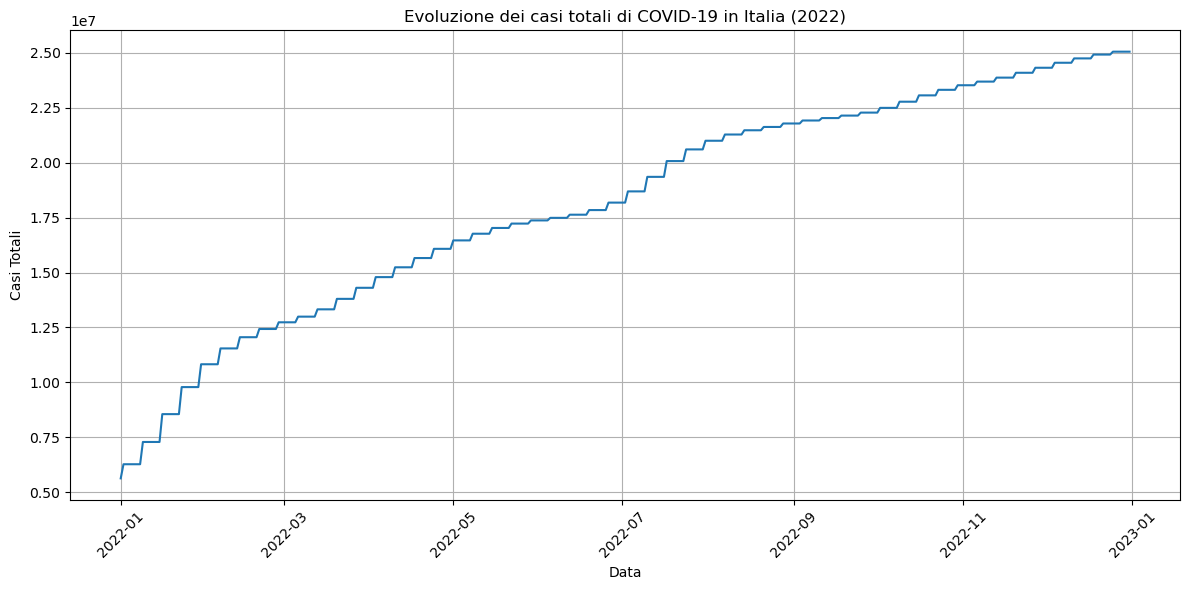

In [325]:
# Ho filtrato i dati per l'Italia nel 2022
italy_data_2022 = continent_data[(continent_data['location'] == 'Italy') & (continent_data['date'].dt.year == 2022)]

# Ho creato il grafico dell'andamento dei casi totali in Italia nel 2022
plt.figure(figsize=(12, 6))
plt.plot(italy_data_2022['date'], italy_data_2022['total_cases'])
plt.title('Evoluzione dei casi totali di COVID-19 in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4b) Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario).

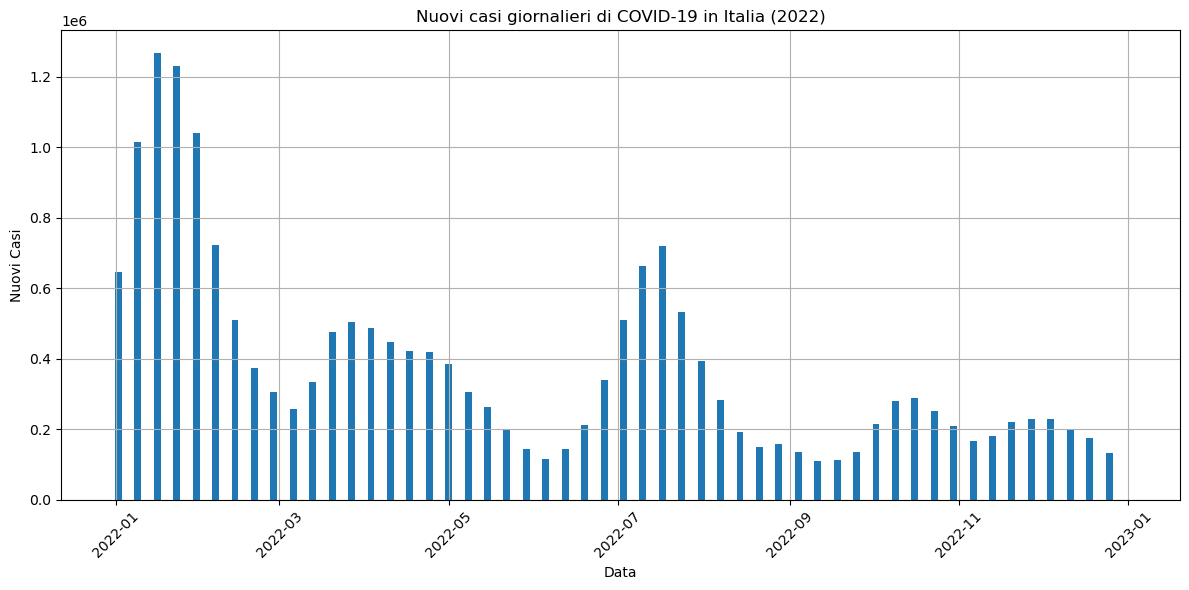

In [327]:
# Ho creato un diagramma a barre dei nuovi casi giornalieri in Italia nel 2022
plt.figure(figsize=(12, 6))
plt.bar(italy_data_2022['date'], italy_data_2022['new_cases'], width=2.5)
plt.title('Nuovi casi giornalieri di COVID-19 in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4c) Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali.

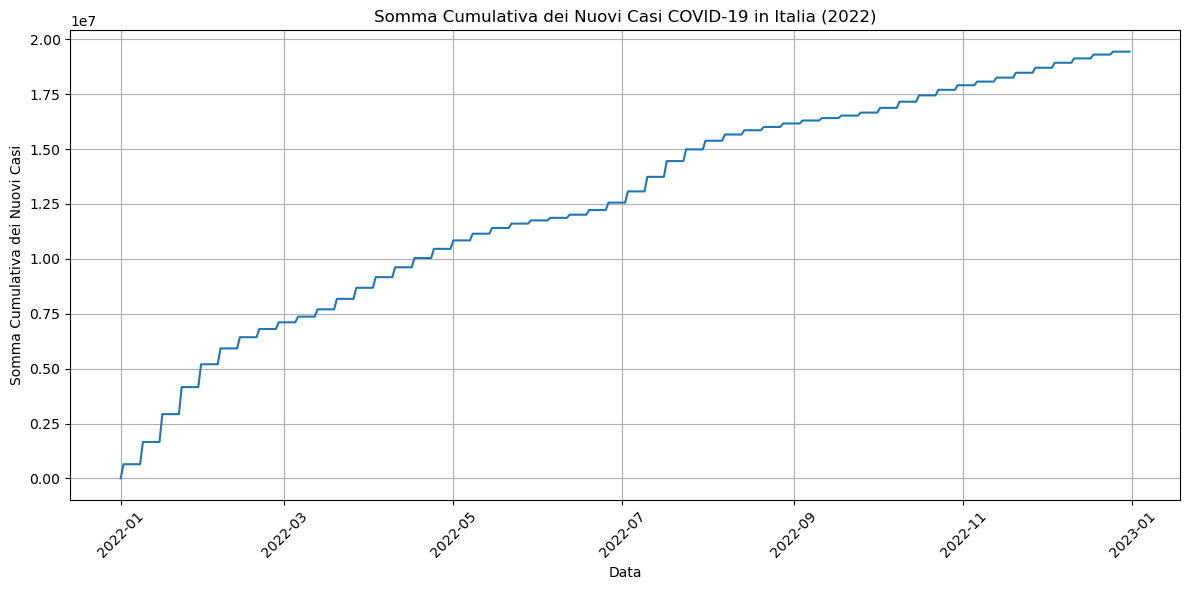

In [333]:
# Calcolo la somma dei nuovi casi per l'Italia nel 2022
somma_new_cases = italy_data_2022['new_cases'].sum()

# Calcolo la somma cumulativa dei nuovi casi per l'Italia nel 2022
italy_data_2022.loc[:, 'cumulative_new_cases'] = italy_data_2022['new_cases'].cumsum()

# Creo il grafico dell'andamento della somma cumulativa dei nuovi casi per l'Italia nel 2022
plt.figure(figsize=(12, 6))
plt.plot(italy_data_2022['date'], italy_data_2022['cumulative_new_cases'])
plt.title('Somma Cumulativa dei Nuovi Casi COVID-19 in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Somma Cumulativa dei Nuovi Casi')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Non ci sono differenza con la tabella 'total_cases'. Infatti nella tabella 'total_cases' sono riportati proprio i valori cumulativi giornalieri.

## 5)Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo.

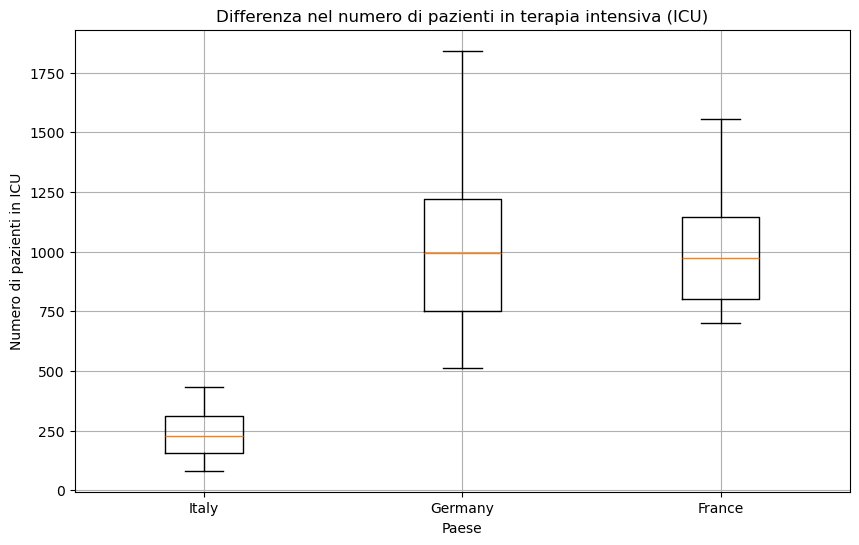

In [335]:
# Filtro i dati per includere solo Italia, Germania e Francia e il periodo da maggio 2022 ad aprile 2023
countries = ['Italy', 'Germany', 'France']
filtered_data = continent_data[(continent_data['location'].isin(countries)) & (continent_data['date'].between('2022-05-01', '2023-04-30'))]

# Creo il boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([filtered_data[filtered_data['location'] == country]['icu_patients'].dropna() for country in countries],
            labels=countries)
plt.title('Differenza nel numero di pazienti in terapia intensiva (ICU)')
plt.xlabel('Paese')
plt.ylabel('Numero di pazienti in ICU')
plt.grid(True)
plt.show()


## 6) Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [337]:
# Ho filtrato i dati per includere solo Italia, Germania, Francia e Spagna per il periodo del 2023
countries = ['Italy', 'Germany', 'France', 'Spain']
filtered_data = continent_data[(continent_data['location'].isin(countries)) & 
                               (continent_data['date'].dt.year == 2023)]

# Ho calcolato la somma dei pazienti ospitalizzati per ciascun paese nel 2023
sum_hosp_patients = filtered_data.groupby('location')['hosp_patients'].sum()

# Ho stampato i risultati
print(sum_hosp_patients)


location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


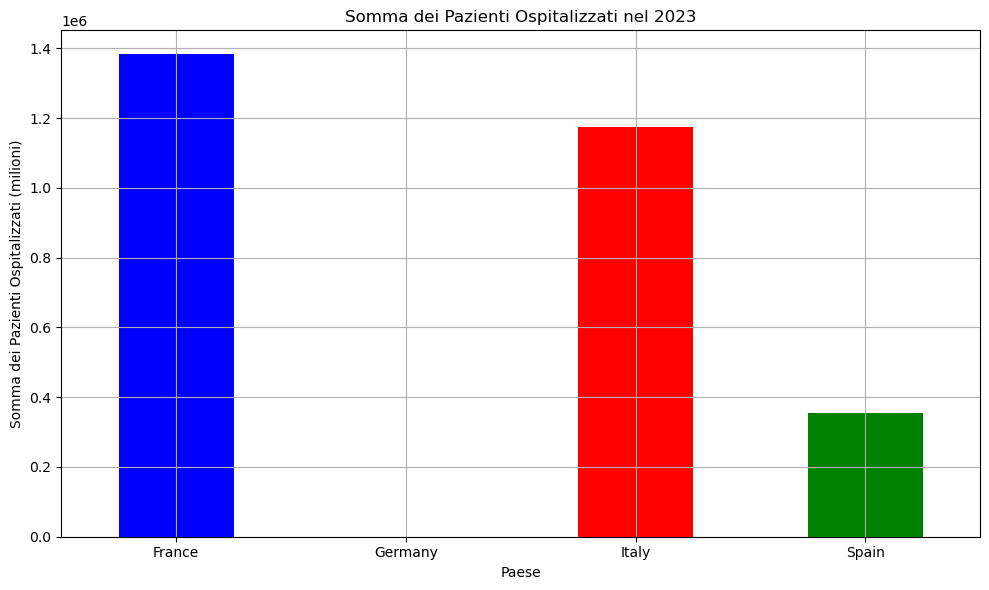

In [339]:
# Infine ho creato un grafico a barre verticali che mi sembrava il più adatto a mostrare il dato
plt.figure(figsize=(10, 6))
sum_hosp_patients.plot(kind='bar', color=['blue', 'purple', 'red', 'green'])
plt.title('Somma dei Pazienti Ospitalizzati nel 2023')
plt.xlabel('Paese')
plt.ylabel('Somma dei Pazienti Ospitalizzati (milioni)')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### COMMENTO: Gestire i dati nulli tramite sostituzione è possibile, ma bisogna fare attenzione al tipo di dato e all'impatto sull'analisi. In generale è sempre meglio non sostituire i dati originali ma creare nuove variabili filtrate e lavorare su quelle.